In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.04.27']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
793,Afghanistan,22.04.27,178809
1598,Africa,22.04.27,11656249
2391,Albania,22.04.27,274929
3184,Algeria,22.04.27,265773
3971,Andorra,22.04.27,41013
...,...,...,...
179064,Wallis and Futuna,22.04.27,454
179892,World,22.04.27,511747564
180640,Yemen,22.04.27,11818
181411,Zambia,22.04.27,319431


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
793,Afghanistan,22.04.27,178809
2391,Albania,22.04.27,274929
3184,Algeria,22.04.27,265773
3971,Andorra,22.04.27,41013
4740,Angola,22.04.27,99287
...,...,...,...
178508,Vietnam,22.04.27,10631516
179064,Wallis and Futuna,22.04.27,454
180640,Yemen,22.04.27,11818
181411,Zambia,22.04.27,319431


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
172454,United States,22.04.27,81189379
76353,India,22.04.27,43068799
23632,Brazil,22.04.27,30399004
58580,France,22.04.27,28536959
62517,Germany,22.04.27,24609159
171627,United Kingdom,22.04.27,22086149
136157,Russia,22.04.27,17894787
153083,South Korea,22.04.27,17086626
82718,Italy,22.04.27,16279754
166958,Turkey,22.04.27,15026141


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
154653,Spain,22.04.27,11833457
178508,Vietnam,22.04.27,10631516
7125,Argentina,22.04.27,9072230
116447,Netherlands,22.04.27,8136587
84323,Japan,22.04.27,7767997
...,...,...,...
99196,Macao,22.04.27,82
176907,Vatican,22.04.27,29
104600,Marshall Islands,22.04.27,17
107456,Micronesia (country),22.04.27,5


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.04.27', df_etc['확진자'].sum()]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
df_top

,일자,확진자
국가,,
United States,22.04.27,81189379
India,22.04.27,43068799
Brazil,22.04.27,30399004
France,22.04.27,28536959
Germany,22.04.27,24609159
United Kingdom,22.04.27,22086149
Russia,22.04.27,17894787
South Korea,22.04.27,17086626
Italy,22.04.27,16279754


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.04.27,81189379
1,India,22.04.27,43068799
2,Brazil,22.04.27,30399004
3,France,22.04.27,28536959
4,Germany,22.04.27,24609159
5,United Kingdom,22.04.27,22086149
6,Russia,22.04.27,17894787
7,South Korea,22.04.27,17086626
8,Italy,22.04.27,16279754
9,Turkey,22.04.27,15026141


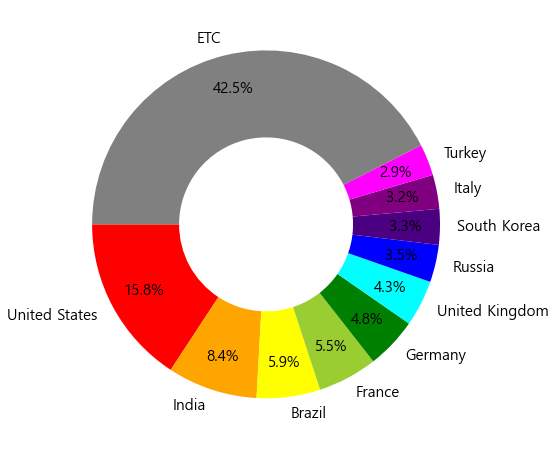

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()